In [1]:
import numpy as np
import pyvista as pv
# Switch off interactive mode
pv.set_jupyter_backend('static')
pv.start_xvfb()

In [2]:
dh, dk, dl = 0.1, 0.1, 0.2
h = np.arange(-2, 3, dh)
k = np.arange(-2, 2, dk)
l = np.arange(1, 10, dl)

H, K, L = np.meshgrid(h, k, l)

In [3]:
widhk = .1
widl = .2

I = np.zeros_like(H)

for h0 in range(-1, 6):
    for k0 in range(-1, 6):
        for l0 in range(0, 21):
            if (h0 + k0)%2 - 0:
                I += 1/(1 + ((H - h0)/widhk)**2 + ((K - k0)/widhk)**2 + ((L - l0)/widl)**2)

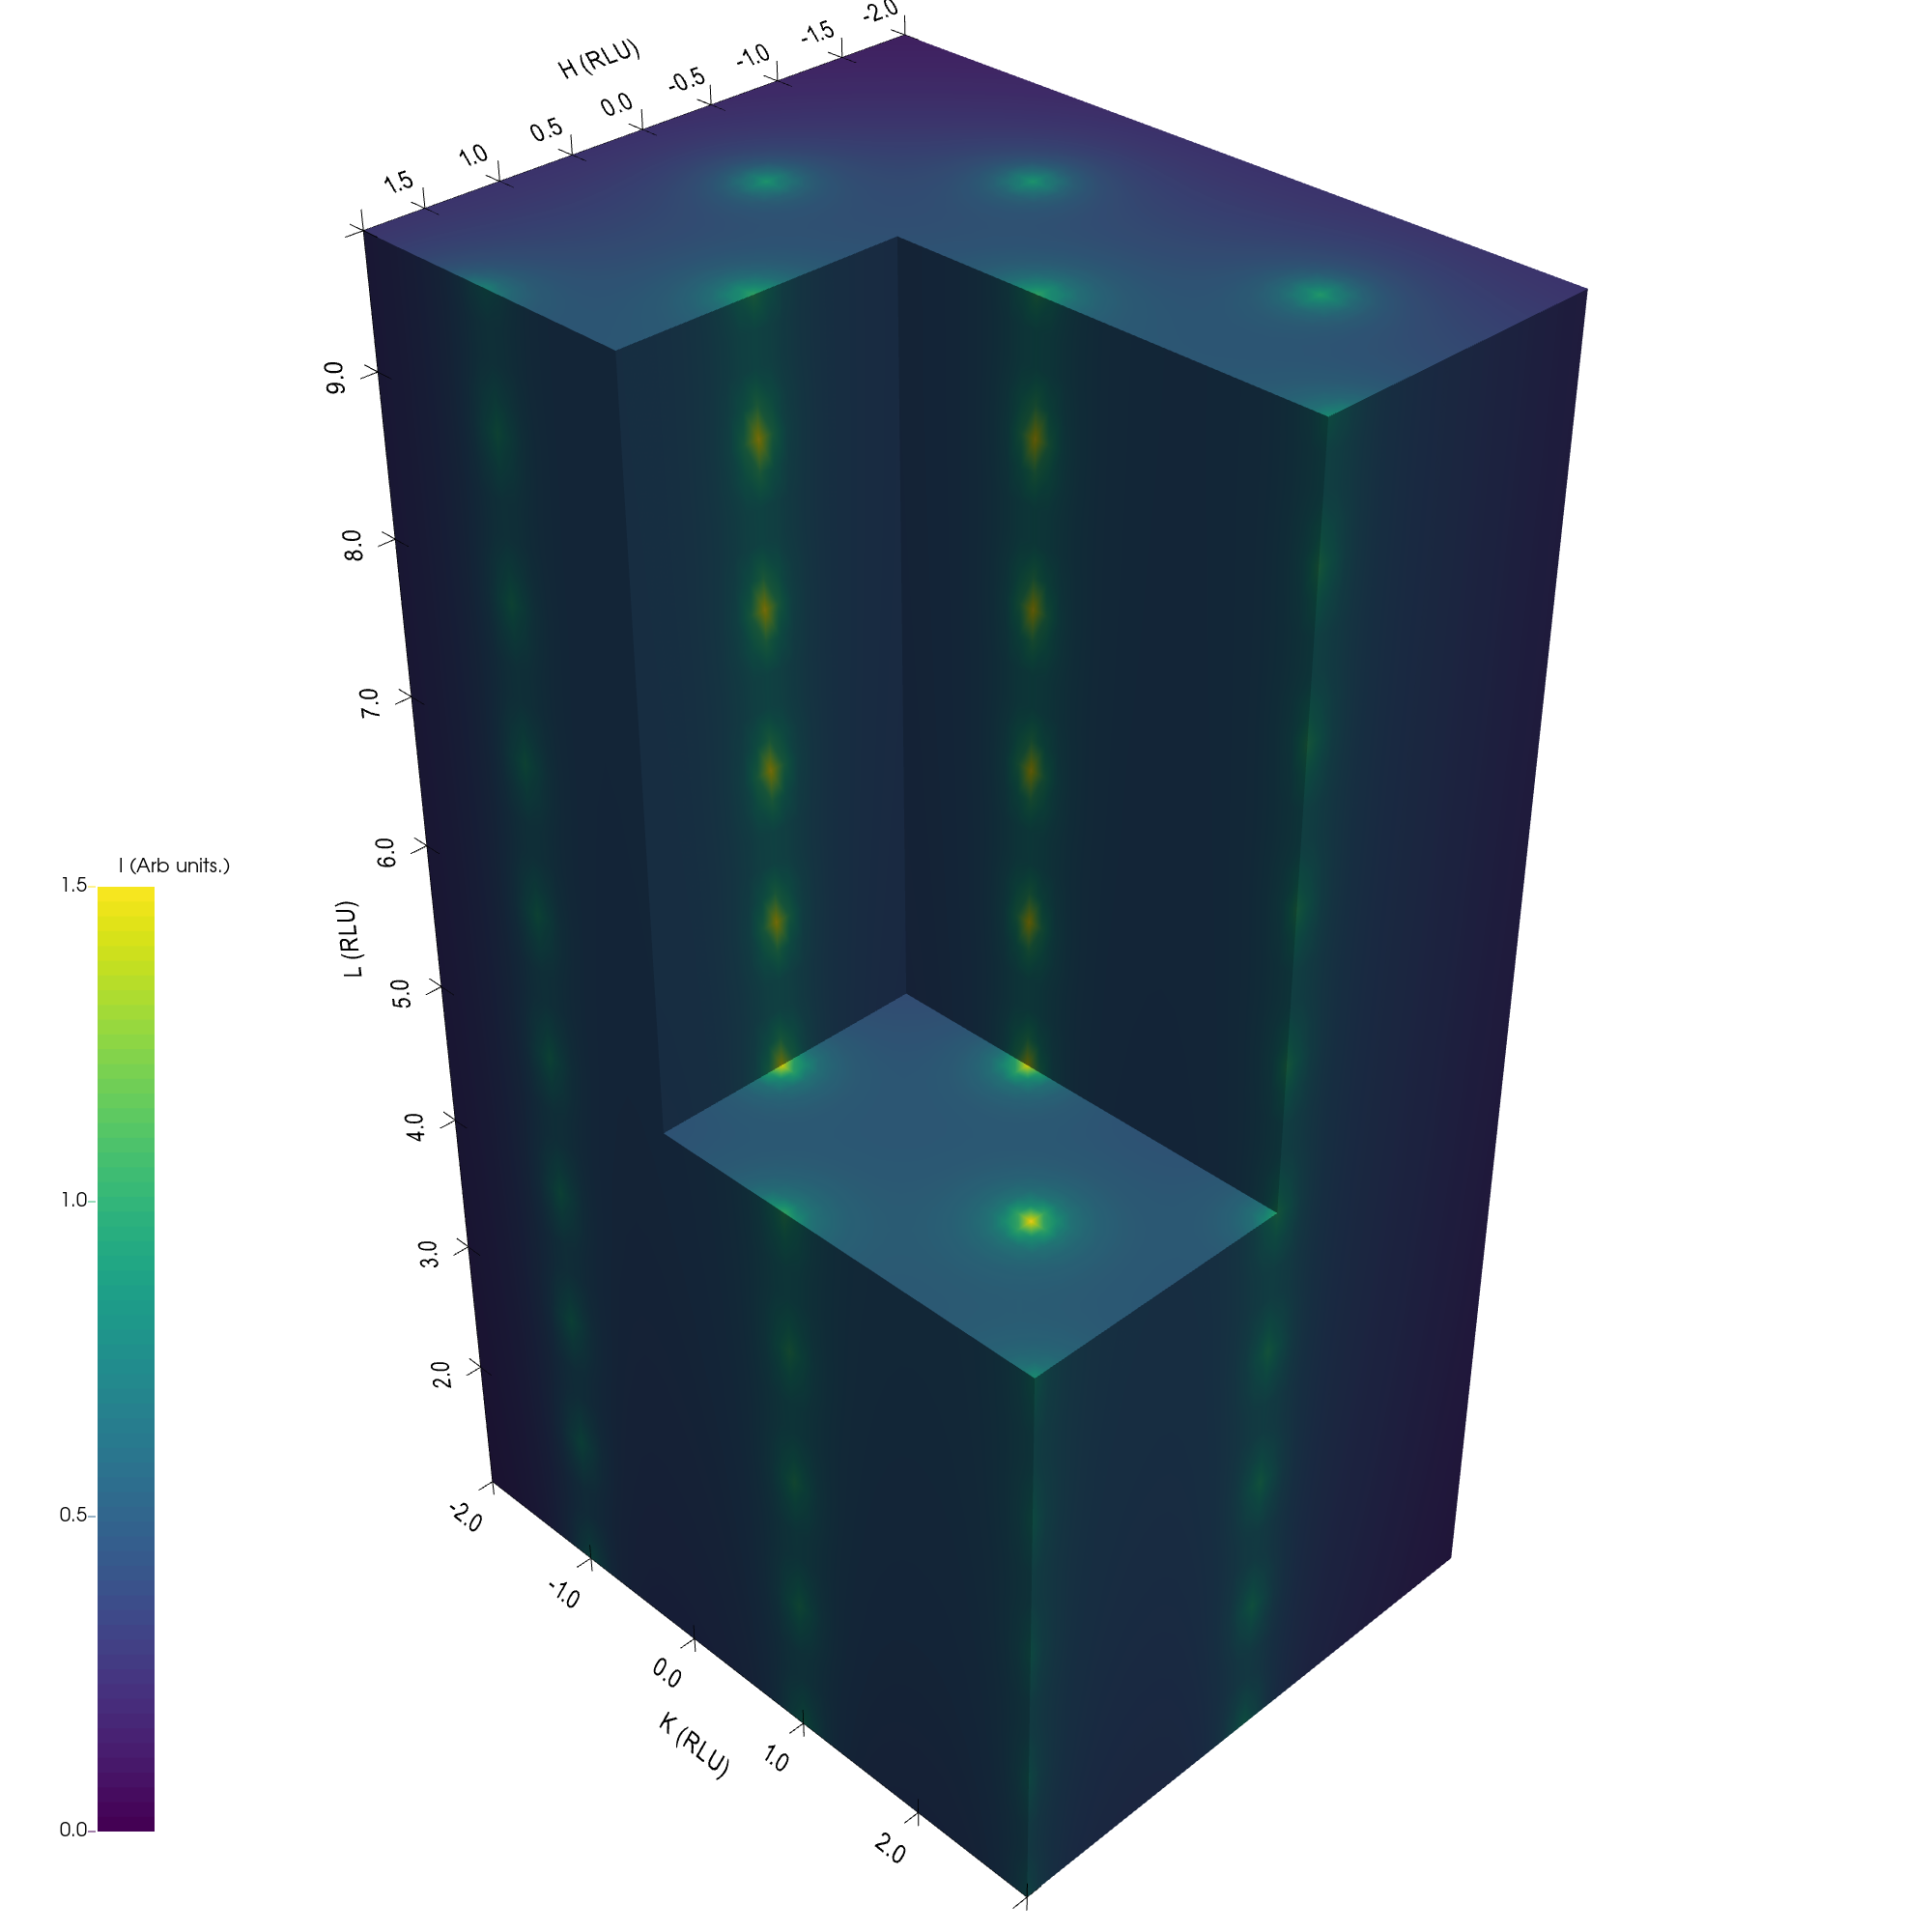

In [4]:
pv.global_theme.font.size = 20

grid = pv.UniformGrid()
grid.dimensions = I.shape

# Edit the spatial reference
grid.origin = (h.min(), k.min(), l.min())  # The bottom left corner of the data set
grid.spacing = (dh, dk, dl)  # These are the cell sizes along each axis

# Add the data values to the cell data
grid.point_data["values"] = I.flatten(order="F")  # Flatten the array!


clipped = grid.clip_box(bounds=(0, 10, 0, 10, 5, 50))

scalar_bar_args = dict(
    title_font_size=20,
    label_font_size=20,
    color='k',
    n_labels=0,
    fmt="%.1f",
    title='I (Arb units.)',
    height=0.5, vertical=True, position_x=0.05, position_y=0.05,
)
clim=(0, 1.5)
annotations = {val:f"{val:.1f}" for val in np.arange(clim[0], clim[1]+1e-6, .5)}

p = pv.Plotter(window_size=[2000, 2000])

p.add_mesh(clipped, scalar_bar_args=scalar_bar_args, clim=clim, annotations=annotations)
labels = dict(xlabel='H (RLU)', ylabel='K (RLU)', zlabel='L (RLU)')
p.show_grid(**labels, color='k')

p.set_background('white')
p.screenshot('ex_23_cuts.png', return_img=False)

p.show()

In [5]:
p.add_mesh??

In [6]:
from PIL import Image

im = Image.open(r'ex_23_cuts.png')
im_rbg = im.convert('RGB')
im_rbg.save(r'ex_23_cuts.pdf')

In [7]:

pv.BasePlotter.add_scalar_bar?